In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

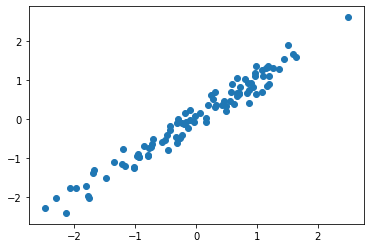

In [2]:
means = [0, 0]
cov = [[1.02, 1], [1, 1.02]]
N = 100
X = np.random.multivariate_normal(means, cov, N)

plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [26]:
X_mean = np.mean(X.T, axis = 1, keepdims = True)
Z = X.T - np.tile(X_mean, (1, N))
S = (Z.dot(Z.T))/N
val, vec = np.linalg.eig(S)
print(X.T.shape)
#print(Z)
print(np.tile(X_mean, (1, N)).shape)
print(vec)
print(vec.T)

(2, 100)
(2, 100)
[[-0.70880017 -0.70540933]
 [ 0.70540933 -0.70880017]]
[[-0.70880017  0.70540933]
 [-0.70540933 -0.70880017]]


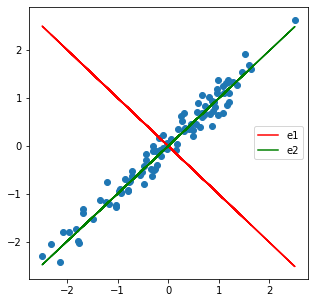

In [19]:
e1 = lambda a: -a*vec[0][0]/vec[0][1]
e2 = lambda b: -b*vec[1][0]/vec[1][1]
Ye1 = e1(X[:, 0])
Ye2 = e2(X[:, 0])

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X[:, 0], Ye1, color = 'red', label = 'e1')
plt.plot(X[:, 0], Ye2, color = 'green', label = 'e2')
plt.legend()

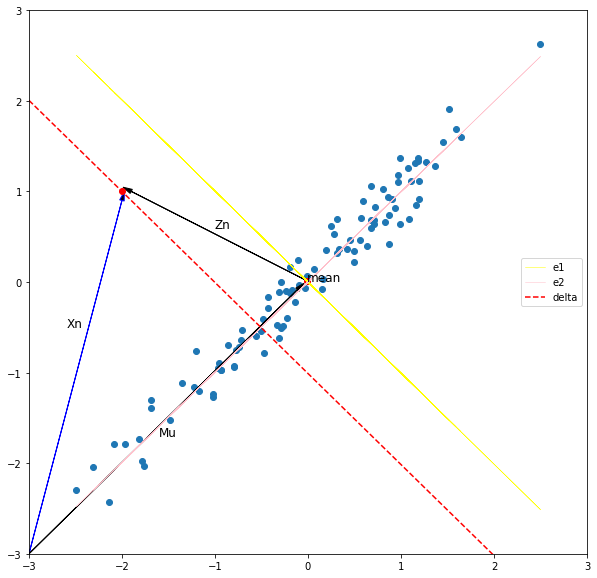

In [20]:
xlim = (-3, 3)
ylim = (-3, 3)

#Xn
Xn = np.array([-2, 1])

#Mean
tmp = np.mean(X, axis = 0,keepdims = True).reshape(-1,1)
u = np.array([np.asscalar(tmp[0]), np.asscalar(tmp[1])])

#origin coordinates
O = np.array([-3, -3])

#Vector Xn
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.arrow(O[0], O[1], Xn[0]-O[0], Xn[1]-O[1]-0.1, head_width=0.05, head_length=0.1, fc='k', ec='blue', color='y')
plt.text(-2.6, -0.5, 'Xn',fontsize=12)

# point Xn, point Mean
plt.plot(Xn[0], Xn[1], 'ro')
plt.plot(u[0], u[1], 'ro')
plt.text(u[0], u[1], 'mean',fontsize=12)
#vector e1, e2
plt.plot(X[:, 0], Ye1, color = 'yellow', label = 'e1', linewidth=0.5)
plt.plot(X[:, 0], Ye2, color = 'pink', label = 'e2', linewidth=0.5)

#vector Mean
ax.arrow(O[0], O[1], u[0] - O[0] - 0.1, u[1] - O[1] - 0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text(-1.6, -1.7, 'Mu',fontsize=12)

#Vector Zn
ax.arrow(u[0], u[1], Xn[0] - u[0] + 0.1, Xn[1] - u[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text(-1, 0.6, 'Zn',fontsize=12)

#Mapping of Xn on e2 
b_delta = Xn[1] + Xn[0]*vec[0][0]/vec[0][1]
delta = lambda a: -a*vec[0][0]/vec[0][1] + b_delta

xgen = np.linspace(-3, 3, 20)
Ydelta = delta(xgen)
plt.plot(xgen, Ydelta, 'r--', label = 'delta')

#data
plt.scatter(X[:, 0], X[:, 1])

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.show()

In [3]:
a  = np.array([[3, 2, 2], [2, 3, -2]])
print(a)
b,c = np.linalg.eig(a.dot(a.T))
print(b)
print(c)
d,e = np.linalg.eig(a.T.dot(a))
print(d)
print(e)

[[ 3  2  2]
 [ 2  3 -2]]
[25.  9.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[2.50000000e+01 3.61082692e-15 9.00000000e+00]
[[-7.07106781e-01 -6.66666667e-01  2.35702260e-01]
 [-7.07106781e-01  6.66666667e-01 -2.35702260e-01]
 [-1.16614446e-17  3.33333333e-01  9.42809042e-01]]


In [6]:
b,c = np.linalg.eig(a.T.dot(a))
print(b)
print(c)

[ 0.13393125 29.86606875]
[[-0.9145143  -0.40455358]
 [ 0.40455358 -0.9145143 ]]


In [9]:
a = np.random.rand(3,3)  # generate a random array shaped (3,3)

a = (a + a.T)/2  # a becomes a random simmetric matrix    

evalues1, evectors1 = np.linalg.eig(a)

evalues2, evectors2 = np.linalg.eigh(a)

print(evalues1)
print(evectors1)
#print(evalues2,evectors2)

[ 1.90806279 -0.08368151 -0.44139188]
[[ 0.66161435  0.73093693  0.16732497]
 [ 0.6015185  -0.38412524 -0.70044506]
 [ 0.44770742 -0.56407357  0.69381487]]


In [10]:
print(evalues2)
print(evectors2)

[-0.44139188 -0.08368151  1.90806279]
[[ 0.16732497 -0.73093693 -0.66161435]
 [-0.70044506  0.38412524 -0.6015185 ]
 [ 0.69381487  0.56407357 -0.44770742]]
